<center>
  <h1 style="background-color:white; color:blue; font-size:50px; font-weight:bold; font-family:Times New Roman; border:2px solid black;"> Data Science Internship by CognoRise </h1>
</center>

# Task_1: TITANIC SURVIVAL PREDICTION

# <font color="purple"><b>Import Library</b></font>

In [1]:
import pandas as pd
import numpy as np

# visualization
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.tree import plot_tree

# modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay, mean_squared_error, mean_absolute_error, r2_score

# <font color="purple"><b>Loading the Dataset</b></font>

In [2]:
df=pd.read_csv(r"D:\Sushil Gupta\Internship\CodSoft\Project\Task 01 Titanic Survival Prediction\tested.csv")

# <font color="purple"><b>Explore the dataset</b></font>

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
df.shape

(418, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [6]:
#Statistical Distribution of Continuous Numerical Value including categorical data
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,0.363636,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.481622,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,0.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,0.000000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,0.000000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,1.000000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


- Fare- Mean value(35) but we can see max value(512) which is far away from it's mean value, also some fare are zero so there are multiple outliers not only in the fare column but also in multiple columns

In [7]:
# Missing Values
# Helpful when we are building some predictive models, it could result in bad prediction if present
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [8]:
# Calculate the percentage of missing values for each column
df.isna().sum() / len(df) * 100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            20.574163
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.239234
Cabin          78.229665
Embarked        0.000000
dtype: float64

# <font color="purple"><b>Data Visualization</b></font>

<Axes: >

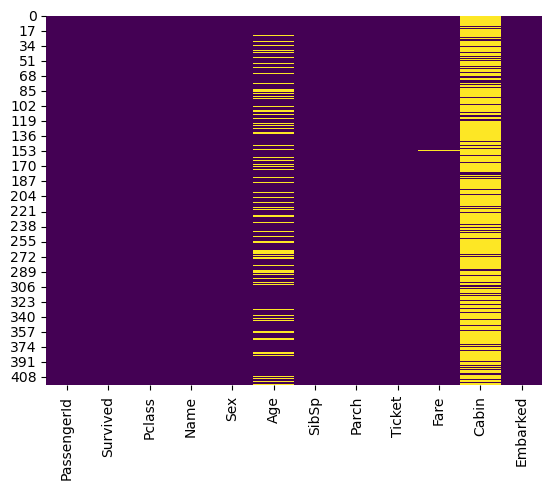

In [9]:
# Heatmap of missing values
sns.heatmap(df.isnull(), cmap='viridis', cbar=False)

In [10]:
# Checking the survival count between male and female
df[["Sex", "Survived"]].groupby(["Sex"], as_index = False).value_counts()

,Sex,Survived,count
0,female,1,152
1,male,0,266


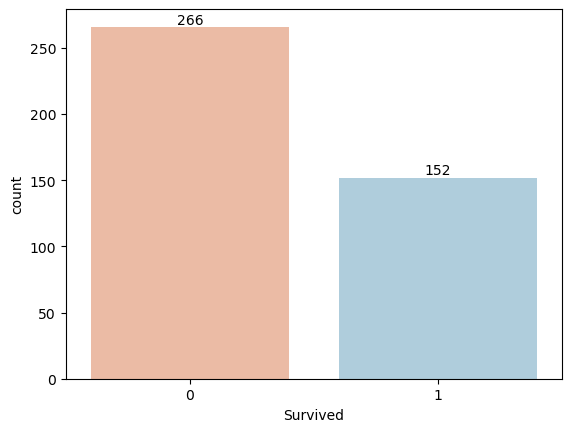

In [11]:
#Plotting the survival rate 
ax = sns.countplot(x=df['Survived'], palette='RdBu')
ax.bar_label(ax.containers[0])
plt.show()

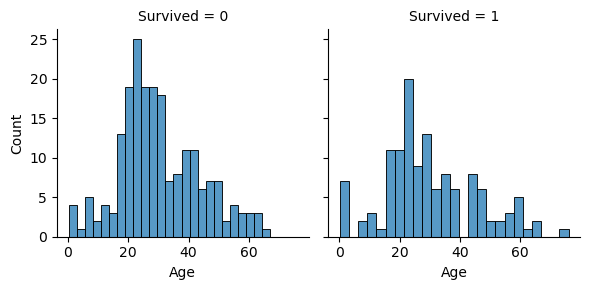

In [12]:
# Plot and see how the age affects the survival chances
sns.FacetGrid(df, col="Survived").map(sns.histplot, "Age", bins=25)
plt.show()

* Left Graph - Survived =0 --> We can see max. number of people in the age group between 18-30 years didn't survived, whereas
* Right Graph - Survived =1 --> We can see less number of people in the age group between 18-38 survived

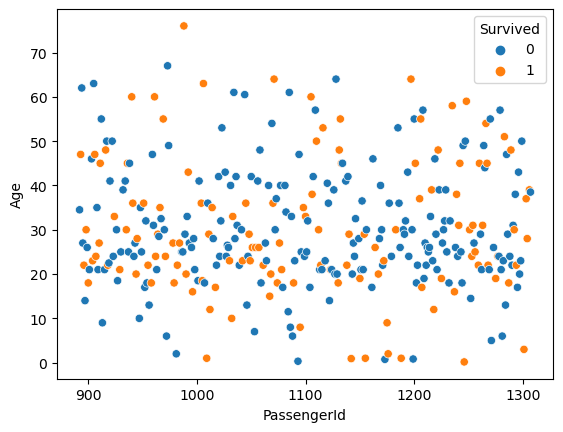

In [13]:
# Plotting the same with the scatter plot
sns.scatterplot(x = df.PassengerId, y = df['Age'], hue = df['Survived'])
plt.show()

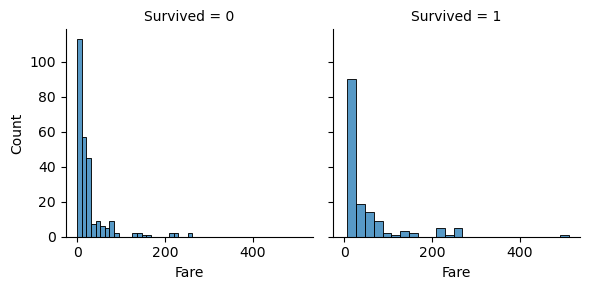

In [14]:
# Plot and see how the fare affects the survival chances
sns.FacetGrid(df, col="Survived").map(sns.histplot, "Fare", bins=25)
plt.show()

* There are few outliers in the right side graph
* Left side graph - Not enough data for fare more than 100, also less fare means very low probability of survival

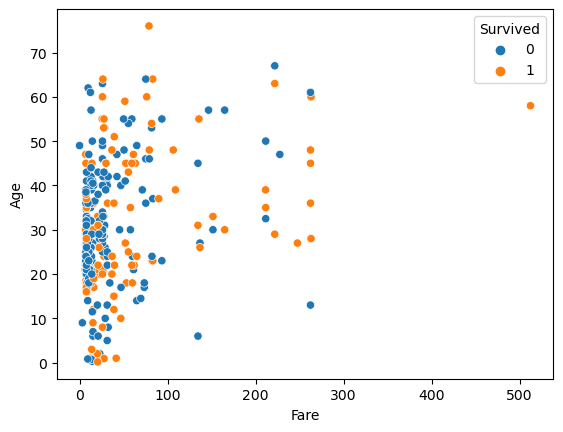

In [15]:
# Plot and see how the Fare and Age combination goes with survival 
sns.scatterplot(x = df.Fare, y = df['Age'], hue = df['Survived'])
plt.show()

* Majority of the people had the fare < 100
* Higher Fare higher the chances of survival  

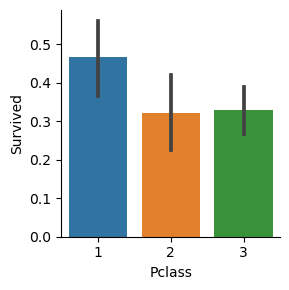

In [16]:
# Checking the relationship between Passenger class and survival
sns.catplot(x="Pclass", y ="Survived", data=df, kind="bar", height=3)
plt.show()

* Passenger Travelling in 1st class - Higher chances of survival over 45%
* Passenger Travelling in 2nd and 3rd class - Lower chances of survival < 30%
* Note - We plot the each class with considering all total passenger in each class which doesnot make any sense to understand the trends so we will bifurcate the count in each class 

In [17]:
df[["Survived", "Pclass"]].groupby(["Pclass"], as_index = False).mean()

,Pclass,Survived
0,1,0.467290
1,2,0.322581
2,3,0.330275


<Axes: xlabel='Survived', ylabel='count'>

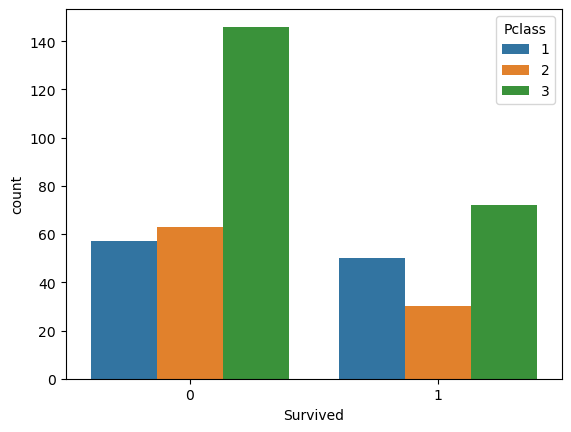

In [18]:
# Polt the count of people who travelled on different classes
sns.countplot(x='Survived',hue='Pclass',data=df)

In [19]:
df[["Survived", "Pclass"]].groupby(["Pclass","Survived"], as_index = False).value_counts()

,Pclass,Survived,count
0,1,0,57
1,1,1,50
2,2,0,63
3,2,1,30
4,3,0,146
5,3,1,72


* Not Survived - Count of passengers travelling in 1st class is not significantly low but passengers travelling in 3rd class is 2x more
* Survived - Passengers travelling in all classes have almost equal count

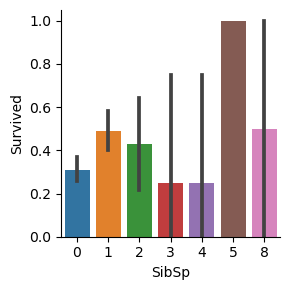

In [20]:
# Plotting the relationship beween the survival of people having siblings and spouses with them
sns.catplot(x="SibSp", y ="Survived", data=df, kind="bar", height=3)
plt.show()

* people travelling with more 5 number of siblings and spouses are having higher chances of survival

In [21]:
df[["SibSp", "Survived"]].groupby(["SibSp"], as_index = False).mean()

,SibSp,Survived
0,0,0.310954
1,1,0.490909
2,2,0.428571
3,3,0.250000
4,4,0.250000
5,5,1.000000
6,8,0.500000


In [22]:
df[['Parch', 'Survived']].groupby(['Parch'], as_index = False).mean()

,Parch,Survived
0,0,0.305556
1,1,0.538462
2,2,0.606061
3,3,0.666667
4,4,1.000000
5,5,0.000000
6,6,0.000000
7,9,0.500000


* people travelling with more number of parents and childrens are having higher chances of survival

In [23]:
# Checking the survival chances of people who boarded the ship on different location
df[["Embarked", "Survived"]].groupby(["Embarked"], as_index = False).agg(['count','mean'])

Survived          
            count      mean
Embarked                   
C             102  0.392157
Q              46  0.521739
S             270  0.325926

* Majority of people have board from Southampton and they had the least prob. of survival with 32% 

# <font color="purple"><b>Feature Engineering and Data Preprocessing</b></font>

In [24]:
#Before changing to numerical
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [25]:
#Convert caterogical data to numerical
genders = {"male": 0, "female": 1}
data = [df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [26]:
#Cross-check after changing to numerical
df.Sex.unique()

array([0, 1], dtype=int64)

In [27]:
#Before changing to numerical
df.Embarked.unique()

array(['Q', 'S', 'C'], dtype=object)

In [28]:
#Convert caterogical data to numerical
embark = {"S": 0, "C": 1, "Q": 2}
data = [df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(embark)

In [29]:
#Cross-check after changing to numerical
df.Embarked.unique()

array([2, 0, 1], dtype=int64)

In [30]:
# Drop the unnecessary columns
df.drop(['PassengerId','Name', 'Ticket'], axis=1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,0,34.5,0,0,7.8292,NaN,2
1,1,3,1,47.0,1,0,7.0000,NaN,0
2,0,2,0,62.0,0,0,9.6875,NaN,2
3,0,3,0,27.0,0,0,8.6625,NaN,0
4,1,3,1,22.0,1,1,12.2875,NaN,0


In [31]:
# Replace missing values in the 'Age' column with the mean
df['Age'].replace(np.nan, df['Age'].mean(), inplace=True)

In [32]:
# Replace missing values in the 'Fare' column with the mean
df['Fare'].replace(np.nan, df['Fare'].mean(), inplace=True)

In [33]:
df.drop(['Cabin'], axis=1, inplace = True)

In [34]:
# seperate list of categorical and numerical variables
cat_var = ['Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
num_var = ['Age', 'Fare']

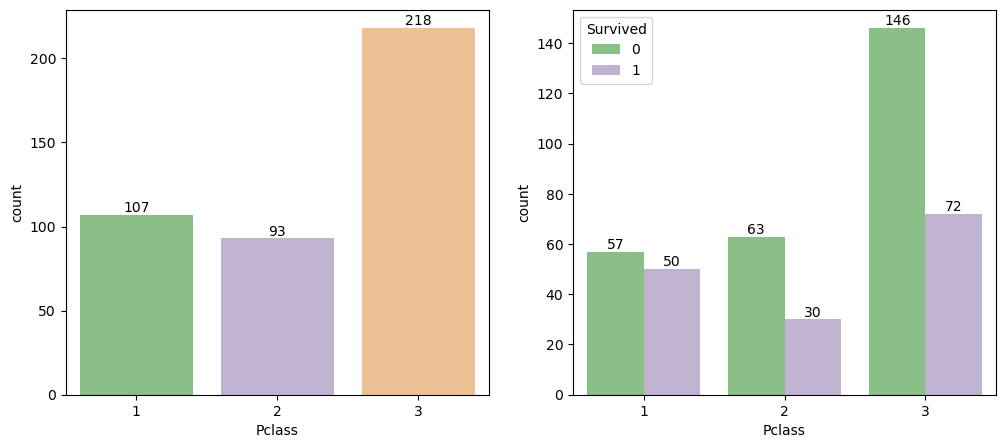

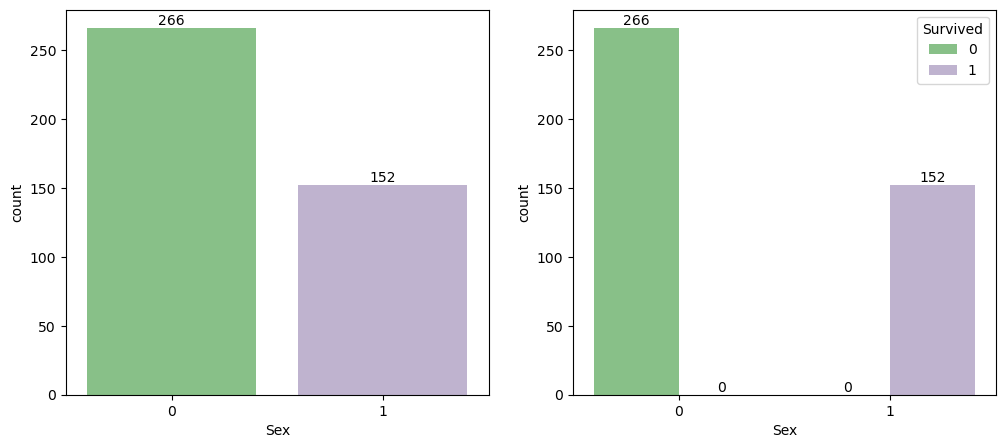

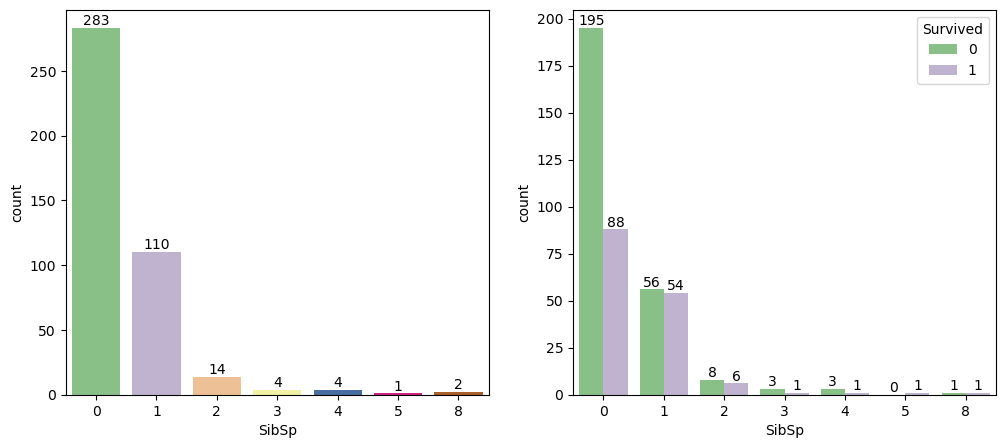

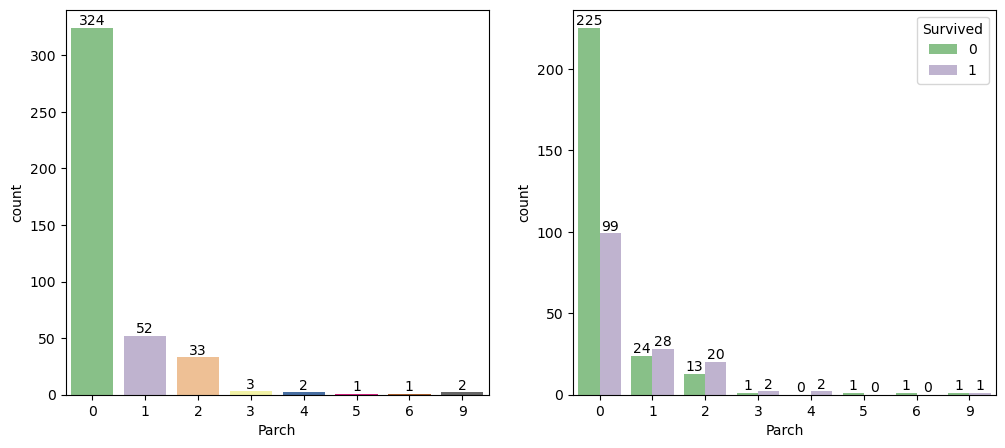

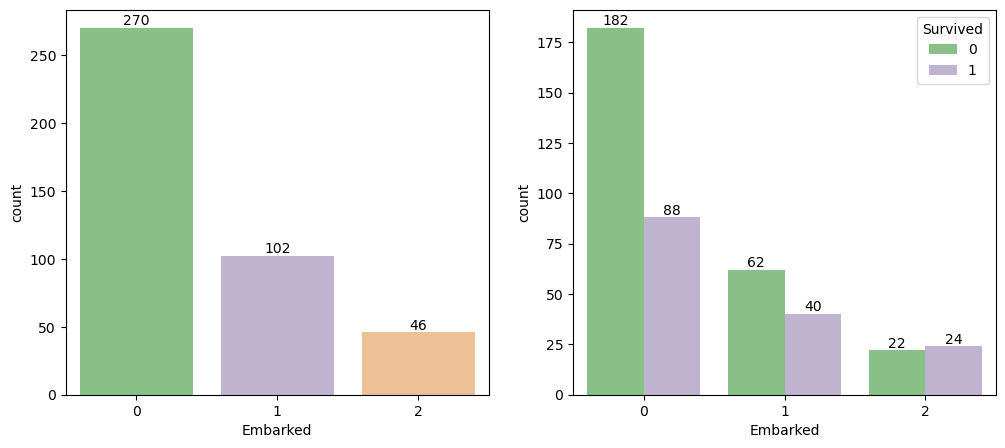

In [35]:
# Loop through categorical variables
for column in cat_var:   
    plt.figure(figsize=(12,5))
    
 # Plot count for each category
    plt.subplot(1,2,1)
    ax = sns.countplot(x=column, data=df, palette='Accent')
    ax.bar_label(ax.containers[0])
    
# Plot count for each category with 'Survived' as hue
    plt.subplot(1,2,2)
    ax = sns.countplot(x=column, data=df, hue='Survived', palette='Accent')
    ax.bar_label(ax.containers[0])
    ax.bar_label(ax.containers[1])
    plt.show()

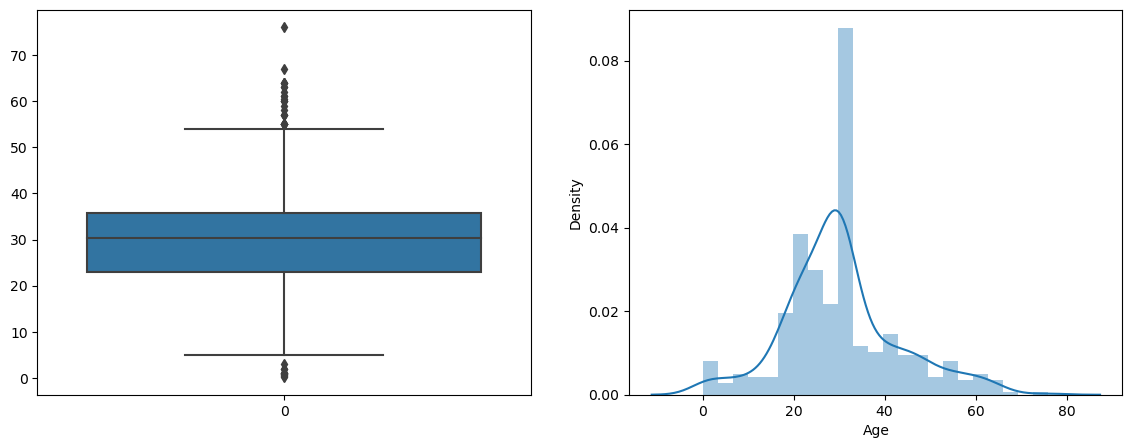

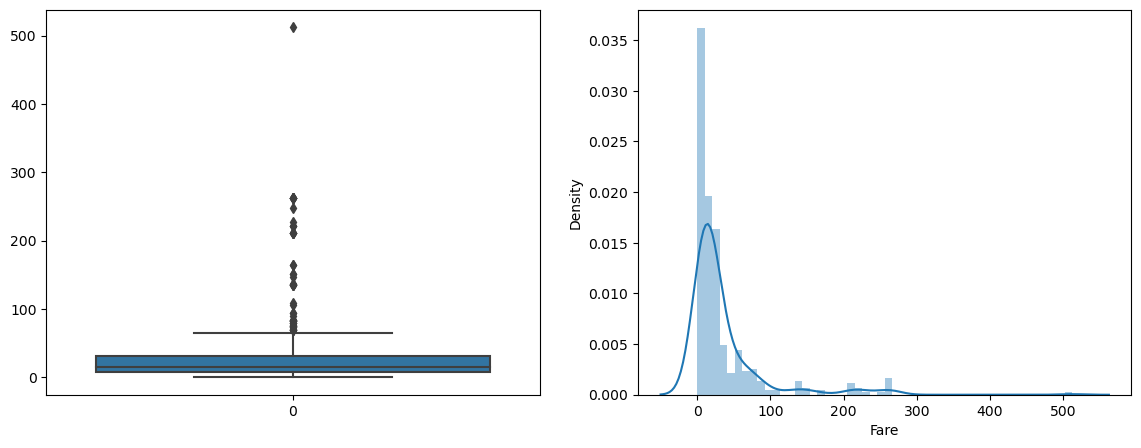

In [36]:
for column in num_var:
    plt.figure(figsize=(14,5))

# Boxplot
    plt.subplot(1,2,1)
    ax = sns.boxplot(df[column])
    
# Distribution plot
    plt.subplot(1,2,2)
    ax = sns.distplot(df[column])
    plt.show()

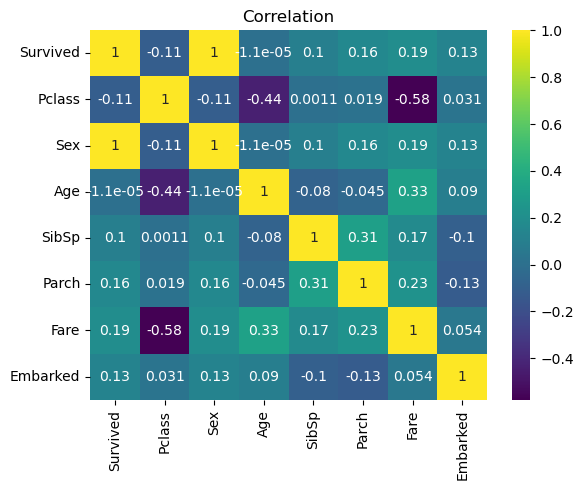

In [37]:
sns.heatmap(df.corr(), annot=True, cmap='viridis')
plt.title('Correlation')
plt.show()

# <font color="purple"><b>Data Splitting</b></font>

In [38]:
X = df.drop('Survived', axis=1)
y = df['Survived']
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,0,34.5,0,0,7.8292,2
1,3,1,47.0,1,0,7.0000,0
2,2,0,62.0,0,0,9.6875,2
3,3,0,27.0,0,0,8.6625,0
4,3,1,22.0,1,1,12.2875,0


In [39]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# <font color="purple"><b>Model Fitting</b></font>

## <font color="red"><b>Logistic Regression</b></font>

In [40]:
lr = LogisticRegression(random_state=42)
lr.fit(X_train,y_train)
lr_pred_train = lr.predict(X_train)
lr_pred_test = lr.predict(X_test)

print('Mean Squared Error (Linear Regression - Test):',   mean_squared_error(y_test, lr_pred_test))
print('Mean Absolute Error  (Linear Regression - Test): ',mean_absolute_error(y_test, lr_pred_test))
print('R2 score (Linear Regression - Train): ',           r2_score(y_train,lr_pred_train))
print('R2 Score (Linear Regression - Test):',             r2_score(y_test,lr_pred_test))

Mean Squared Error (Linear Regression - Test): 0.0
Mean Absolute Error  (Linear Regression - Test):  0.0
R2 score (Linear Regression - Train):  1.0
R2 Score (Linear Regression - Test): 1.0


In [41]:
lr.coef_

array([[-1.08921179e-01,  6.29117655e+00, -3.16349718e-03,
         6.93285391e-02,  9.19414145e-02,  2.37562833e-03,
         2.30373393e-01]])

In [42]:
lr.intercept_

array([-3.40767476])

In [43]:
lr.classes_

array([0, 1], dtype=int64)

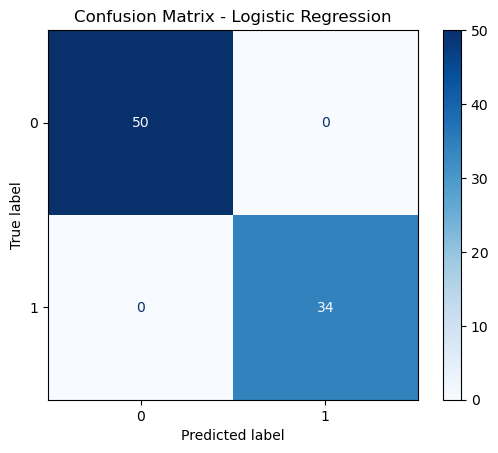

In [44]:
cm = confusion_matrix(y_test, lr_pred_test,labels=lr.classes_)

# Display confusion matrix using ConfusionMatrixDisplay with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".5g")

# Set the title
plt.title("Confusion Matrix - Logistic Regression")

# Show the plot
plt.show()

## <font color="red"><b>Decision Tree Classifier</b></font>

In [45]:
dt = DecisionTreeClassifier(max_depth=9,random_state=42)
dt.fit(X_train,y_train)
y_pred_dt_train = dt.predict(X_train)
y_pred_dt_test = dt.predict(X_test)

print('Mean Squared Error (Decision Tree - Test):',mean_squared_error(y_test, y_pred_dt_test))
print('Mean Absolute Error  (Decision Tree - Test): ',mean_absolute_error(y_test, y_pred_dt_test))
print('R2 score (Decision Tree - Train): ',r2_score(y_train,y_pred_dt_train))
print('R2 Score (Decision Tree - Test):',r2_score(y_test,y_pred_dt_test))

Mean Squared Error (Decision Tree - Test): 0.0
Mean Absolute Error  (Decision Tree - Test):  0.0
R2 score (Decision Tree - Train):  1.0
R2 Score (Decision Tree - Test): 1.0


In [46]:
print('Accuracy: ', accuracy_score(y_test, y_pred_dt_test))
print('Precision: ', precision_score(y_test, y_pred_dt_test))
print('Recall: ', recall_score(y_test, y_pred_dt_test))
print('F1 Score: ', f1_score(y_test, y_pred_dt_test))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


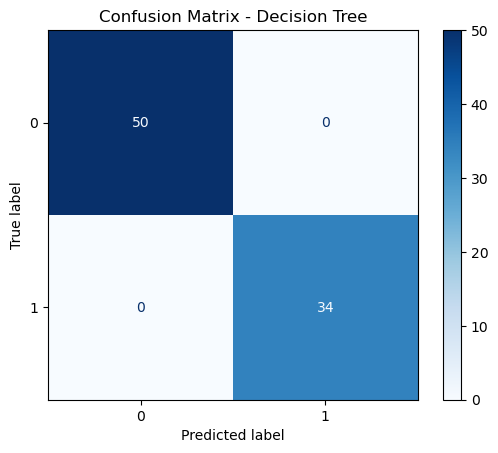

In [47]:
cm = confusion_matrix(y_test, y_pred_dt_test, labels=dt.classes_)

# Display confusion matrix using ConfusionMatrixDisplay with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".5g")

# Set the title
plt.title("Confusion Matrix - Decision Tree")

# Show the plot
plt.show()

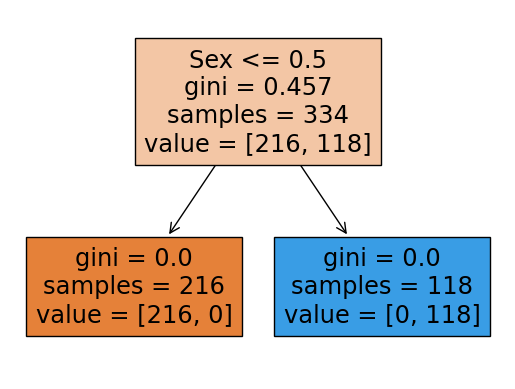

In [48]:
from sklearn.tree import plot_tree
plot_tree(dt, filled=True, feature_names=list(X.columns)) 
plt.show()

## <font color="red"><b>Random Forest Classifier</b></font>

In [49]:
rfg = RandomForestClassifier()
rfg.fit(X_train,y_train)
rf_pred_train = rfg.predict(X_train)
rf_pred_test = rfg.predict(X_test)

print('Mean Squared Error (Random Forest - Test):',mean_squared_error(y_test, rf_pred_test))
print('Mean Absolute Error  (Random Forest - Test): ',mean_absolute_error(y_test, rf_pred_test))
print('R2 score (Random Forest - Train): ',r2_score(y_train,rf_pred_train))
print('R2 Score (Random Forest - Test):',r2_score(y_test,rf_pred_test))

Mean Squared Error (Random Forest - Test): 0.0
Mean Absolute Error  (Random Forest - Test):  0.0
R2 score (Random Forest - Train):  1.0
R2 Score (Random Forest - Test): 1.0


In [50]:
print('Accuracy: ', accuracy_score(y_test, rf_pred_test))
print('Precision: ', precision_score(y_test, rf_pred_test))
print('Recall: ', recall_score(y_test, rf_pred_test))
print('F1 Score: ', f1_score(y_test, rf_pred_test))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


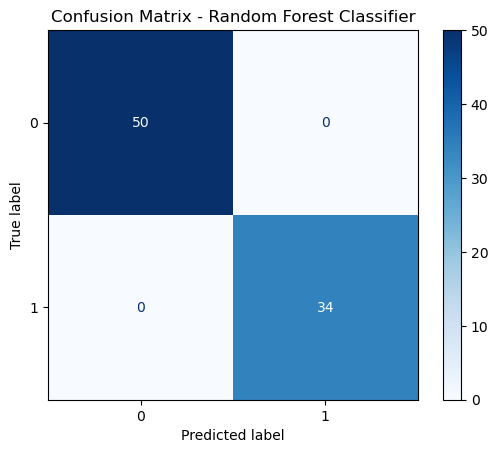

In [51]:
cm = confusion_matrix(y_test, rf_pred_test, labels=rfg.classes_)

# Display confusion matrix using ConfusionMatrixDisplay with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rfg.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".5g")

# Set the title
plt.title("Confusion Matrix - Random Forest Classifier")

# Show the plot
plt.show()

## <font color="red"><b>K-Nearest Neighbour Classifier</b></font>

In [52]:
knn = RandomForestClassifier()
knn.fit(X_train,y_train)
knn_pred_train = knn.predict(X_train)
knn_pred_test = knn.predict(X_test)

print('Mean Squared Error (Random Forest - Test):',mean_squared_error(y_test, knn_pred_test))
print('Mean Absolute Error  (Random Forest - Test): ',mean_absolute_error(y_test, knn_pred_test))
print('R2 score (Random Forest - Train): ',r2_score(y_train,knn_pred_train))
print('R2 Score (Random Forest - Test):',r2_score(y_test,knn_pred_test))

Mean Squared Error (Random Forest - Test): 0.0
Mean Absolute Error  (Random Forest - Test):  0.0
R2 score (Random Forest - Train):  1.0
R2 Score (Random Forest - Test): 1.0


In [53]:
print('Accuracy: ', accuracy_score(y_test, knn_pred_test))
print('Precision: ', precision_score(y_test, knn_pred_test))
print('Recall: ', recall_score(y_test, knn_pred_test))
print('F1 Score: ', f1_score(y_test, knn_pred_test))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


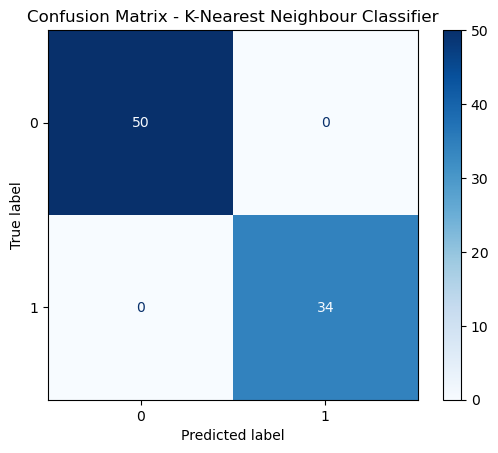

In [54]:
cm = confusion_matrix(y_test, knn_pred_test, labels=knn.classes_)

# Display confusion matrix using ConfusionMatrixDisplay with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=knn.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".5g")

# Set the title
plt.title("Confusion Matrix - K-Nearest Neighbour Classifier")

# Show the plot
plt.show()

## <font color="red"><b>Gradient Boosting Classifier</b></font>

In [55]:
gbr = GradientBoostingClassifier(n_estimators=100, random_state=60)
gbr.fit(X_train, y_train)
y_pred_gbr_train = gbr.predict(X_train)
y_pred_gbr_test = gbr.predict(X_test)

print('Mean Squared Error (Gradient Boost - Test):', mean_squared_error(y_test, y_pred_gbr_test))
print('Mean Absolute Error  (Gradient Boost - Test): ',mean_absolute_error(y_test, y_pred_gbr_test))
print('R2 score (Gradient Boost - Train): ', r2_score(y_train, y_pred_gbr_train))
print('R2 Score (Gradient Boost - Test):', r2_score(y_test,y_pred_gbr_test))

Mean Squared Error (Gradient Boost - Test): 0.0
Mean Absolute Error  (Gradient Boost - Test):  0.0
R2 score (Gradient Boost - Train):  1.0
R2 Score (Gradient Boost - Test): 1.0


In [56]:
print('Accuracy: ', accuracy_score(y_test, y_pred_gbr_test))
print('Precision: ', precision_score(y_test, y_pred_gbr_test))
print('Recall: ', recall_score(y_test, y_pred_gbr_test))
print('F1 Score: ', f1_score(y_test, y_pred_gbr_test))

Accuracy:  1.0
Precision:  1.0
Recall:  1.0
F1 Score:  1.0


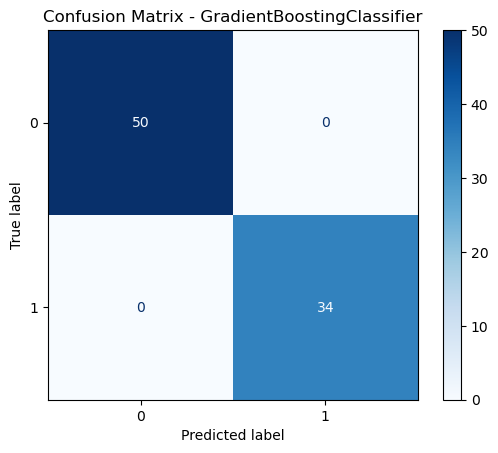

In [57]:
cm = confusion_matrix(y_test, y_pred_gbr_test, labels=gbr.classes_)

# Display confusion matrix using ConfusionMatrixDisplay with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=gbr.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".5g")

# Set the title
plt.title("Confusion Matrix - GradientBoostingClassifier")

# Show the plot
plt.show()

## <font color="red"><b>Extreme Gradient Boosting (xgboost)Classifier</b></font>

In [58]:
# Create and train the XGBoost Regressor model
xgboost = XGBClassifier(random_state=42)
xgboost.fit(X_train, y_train)
y_pred_xgboost_train = xgboost.predict(X_train)
y_pred_xgboost_test = xgboost.predict(X_test)

print('Mean Squared Error (xgboost - Test):', mean_squared_error(y_test, y_pred_xgboost_test))
print('Mean Absolute Error  (xgboost - Test): ',mean_absolute_error(y_test, y_pred_xgboost_test))
print('R2 score (xgboost - Train): ', r2_score(y_train, y_pred_xgboost_train))
print('R2 Score (xgboost - Test):', r2_score(y_test,y_pred_xgboost_test))

Mean Squared Error (xgboost - Test): 0.0
Mean Absolute Error  (xgboost - Test):  0.0
R2 score (xgboost - Train):  1.0
R2 Score (xgboost - Test): 1.0


In [59]:
print(classification_report(y_test, y_pred_xgboost_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        34

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



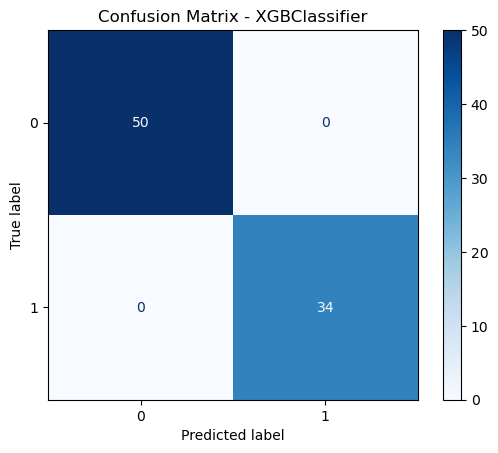

In [60]:
cm = confusion_matrix(y_test, y_pred_xgboost_test, labels=xgboost.classes_)

# Display confusion matrix using ConfusionMatrixDisplay with class labels
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=xgboost.classes_)
disp.plot(cmap=plt.cm.Blues, values_format=".5g")

# Set the title
plt.title("Confusion Matrix - XGBClassifier")

# Show the plot
plt.show()

# <font color="purple"><b>Prediction & Visualize Evaluation</b></font>

In [61]:
# Create a prediction dataframe by Random Forest Regressor Model
prediction_Random_Forest_Regressor  = pd.DataFrame({'actual_rating': y_test,
                        'predicted_rating': rf_pred_test.ravel(),
                        'residual': y_test - rf_pred_test}
                      )
prediction_Random_Forest_Regressor.head(10)

,actual_rating,predicted_rating,residual
321,0,0,0
324,1,1,0
388,0,0,0
56,0,0,0
153,1,1,0
30,0,0,0
72,1,1,0
82,0,0,0
258,1,1,0
416,0,0,0


In [62]:
def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(r2_score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(r2_score(y_true, y_pred)*100, 2)

In [63]:
LRScore = evaluate_model(y_test, lr_pred_test, "LOGISTIC REGRESSION")
RFScore = evaluate_model(y_test, rf_pred_test, "RANDOM FOREST")
DTScore = evaluate_model(y_test, y_pred_dt_test, "DECISION TREE")
KNNScore = evaluate_model(y_test, knn_pred_test, "KNN CLASSIFIER")
XGBScore = evaluate_model(y_test, y_pred_xgboost_test, "EXTENDED GRADIENT BOOSTING")
GBScore = evaluate_model(y_test, y_pred_gbr_test, "GRADIENT BOOSTING")

Model:  LOGISTIC REGRESSION
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  RANDOM FOREST
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  DECISION TREE
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  KNN CLASSIFIER
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  EXTENDED GRADIENT BOOSTING
Accuracy = 100.00%
Mean Squared Error = 0.00

Model:  GRADIENT BOOSTING
Accuracy = 100.00%
Mean Squared Error = 0.00



In [64]:
models = pd.DataFrame(
    {
        "MODELS": ["Logistic Regression", "Random Forest Classifier", "Decision Tree",
                   "KNN Classifier","Gradient Boosting Classifier", "Extended Gradient Boosting Classifier"],
        "SCORES": [LRScore, RFScore, DTScore, KNNScore, XGBScore, GBScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
0,Logistic Regression,100.0
1,Random Forest Classifier,100.0
2,Decision Tree,100.0
3,KNN Classifier,100.0
4,Gradient Boosting Classifier,100.0
5,Extended Gradient Boosting Classifier,100.0
